**Author: ZHONG, Ziyu** &nbsp;&nbsp;&nbsp; **Student ID: 20923387 &nbsp;&nbsp;&nbsp; Date: 2023/03/07**

# Problem 2: Phase Transition in Compressed Sensing

Let $A\in \mathbb{R}^{n\times d}$ be a Gaussian random matrix, i.e. $A_{ij}\sim \mathcal{N}(0,1)$. In the following experiments, fix $d = 20$. For each $n = 1,...,d$, and each $k = 1,...,d$, repeat the following procedure 50 times: 

(a) Construct a sparse vector $x_0 \in \mathbb{R}^d$ with $k$ nonzero entries. The locations of the nonzero entries are selected at random and each nonzero equals $\pm$ 1 with equal probability;

(b) Draw a standard Gaussian random matrix $A\in \mathbb{R}^{n\times d}$, and set $b = Ax_0$;

(c) Solve the following linear programming problem to obtain an optimal point $\hat{x}$,

\begin{equation}
\min_x\quad \lVert x \rVert_1 \\
s.t\quad Ax=b
\end{equation}

(d) Declare success if $\lVert \hat{x} - x_0 \rVert \leqslant 10^{-3}$;

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
d = 20
T = 50
p = np.zeros([d,d]) # success probability matrix
for n in range(1,d+1):
    for k in range(1,d+1):
        for _ in range(T):
            # generate random data
            x_0 = np.random.choice([-1.,1.],d)
            x_0[np.random.choice(d,d-k,replace=False)] = 0
            A = np.random.randn(n,d)
            b = A @ x_0

            # solve the problem
            x = cp.Variable(d)
            objective = cp.Minimize(cp.norm(x, 1))
            constraints = [A @ x == b]
            prob = cp.Problem(objective, constraints)
            result = prob.solve()
            p[n-1, k-1] += sum(abs(x.value-x_0))<1e-3
p /= T

Draw a figure with x-axis for k and y-axis for n, to visualize the success probability

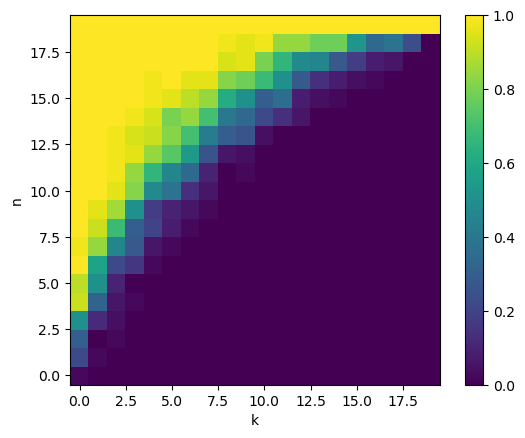

In [3]:
plt.imshow(p, origin='lower')
plt.colorbar()
plt.xlabel('k')
plt.ylabel('n')
plt.show()

Let $f(x) = \lVert x \rVert_1$, the descent cone $\mathscr{D}(f,x_0)$ describe the cone formed from $\{x: f(x)\leqslant f(x_0)\}$, which represents the feasible space of $\min{f(x)}$.

For $n$ equations in $Ax = b$, the null space almost surely has a statistical dimension $\delta(\mathscr{N}(A)) = d - n$, while the objective $\min{f(x)}$ contributes a statistical dimension $\delta(\mathscr{D}(f,x_0))$. And by Approximate kinematic formula, when $\delta(\mathscr{N}(A)) + \delta(\mathscr{D}(f,x_0)) = d - n + \delta(\mathscr{D}(f,x_0)) \approx d$, i.e. $\delta(\mathscr{D}(f,x_0)) \approx n$, the phase transition takes place. And $\delta(\mathscr{D}(f,x_0)) > n + a_\eta\sqrt{d}$ will lead to $\mathbb{P}\{\mathscr{D}(f,x_0)\cap \mathscr{N}(A) = \{0\}\} \leqslant \eta$, i.e. succeeds with probability $\leqslant \eta$.

Since the statistical dimension increases with the size of a cone, $\delta(\mathscr{D}(f,x_0))$ will be larger as $k$ increases, this explains the figure.